In [16]:
import pandas as pd
import nltk
from helper_functions.utils import Utils

In [17]:
utilities = Utils()
so_posts = utilities.dataset_importer("../data/raw/nlp_so_posts.csv", "Body")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muthu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
so_posts['Tags'] = so_posts['Tags'].astype(str)

In [19]:
so_posts.head(5)

,Post Link,PostTypeId,OwnerUserId,Answer Link,Title,Body,CreationDate,ClosedDate,LastEditDate,LastActivityDate,Tags,AnswerCount,CommentCount,Score,ViewCount,FavoriteCount
0,39784522,1,3157709.0,NaN,Can Artificial Neural Networks Learn Language ...,<p>I am new to research field in NLP. I want t...,30-09-2016 05:47,NaN,NaN,30-09-2016 07:46,<nlp><neural-network><language-model>,1.0,0,1,126.0,0.0
1,20368838,1,2518644.0,NaN,Compile java program using external jar file,<p>I working with standford core nlp packages....,04-12-2013 06:47,NaN,26-11-2014 05:08,26-11-2014 05:08,<java><stanford-nlp>,2.0,0,1,1082.0,NaN
2,25332,1,1592.0,NaN,What's a good natural language library to use ...,<p>I'm looking for an existing library to summ...,24-08-2008 20:57,02-01-2016 07:47,28-01-2009 00:24,02-04-2014 23:33,<language-agnostic><nlp>,4.0,1,14,6283.0,0.0
3,19425359,1,2890097.0,NaN,Save Naive Bayes Classifier in memory,<p>I am new in NLTK and machine learning. I'm ...,17-10-2013 11:22,NaN,04-09-2015 08:40,04-09-2015 08:40,<python><nltk>,1.0,2,1,791.0,NaN
4,57720955,1,4544413.0,NaN,Can't import the encoder code for fine tuning ...,<p>I'm trying to reproduce the example from th...,30-08-2019 05:30,NaN,29-11-2020 11:58,02-04-2023 17:27,<python><path><nlp><init><gpt-2>,5.0,1,3,2993.0,NaN


In [20]:
def clean_tags(s):
    s=str(s)
    n=len(s)
    ls=[]
    for i in range(0,n):
        if s[i]=='<':
            for j in range(i+1,n):
                if s[j]=='>':
                    ls.append(s[i+1:j])
                    i=j+1
                    break
    s=" "
    s=s.join(ls)
    return s

tag=lambda s:clean_tags(s)
so_posts['Tags']=pd.DataFrame(so_posts.Tags.apply(tag))

In [21]:
so_posts['Tags']

0                        nlp neural-network language-model
1                                        java stanford-nlp
2                                    language-agnostic nlp
3                                              python nltk
4                               python path nlp init gpt-2
                               ...                        
47531                                r plot topic-modeling
47532    python web-scraping topic-modeling stackexchan...
47536               python pandas loops lda topic-modeling
47539    python python-3.x topic-modeling countvectoriz...
47545                            python pip topic-modeling
Name: Tags, Length: 39767, dtype: object

In [22]:
so_posts['Tags'] = so_posts['Tags'].apply(lambda x: x.split())

In [23]:
all_tags = [item for sublist in so_posts['Tags'].values for item in sublist]

In [24]:
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

3857

In [25]:
flat_list = [item for sublist in so_posts['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(len(unique_tags))
tags_features = [word[0] for word in frequencies_words]

In [26]:
keywords

FreqDist({'nlp': 20272, 'python': 19075, 'nltk': 7144, 'spacy': 3757, 'machine-learning': 3616, 'stanford-nlp': 3308, 'java': 3218, 'huggingface-transformers': 2952, 'python-3.x': 2816, 'gensim': 2434, ...})

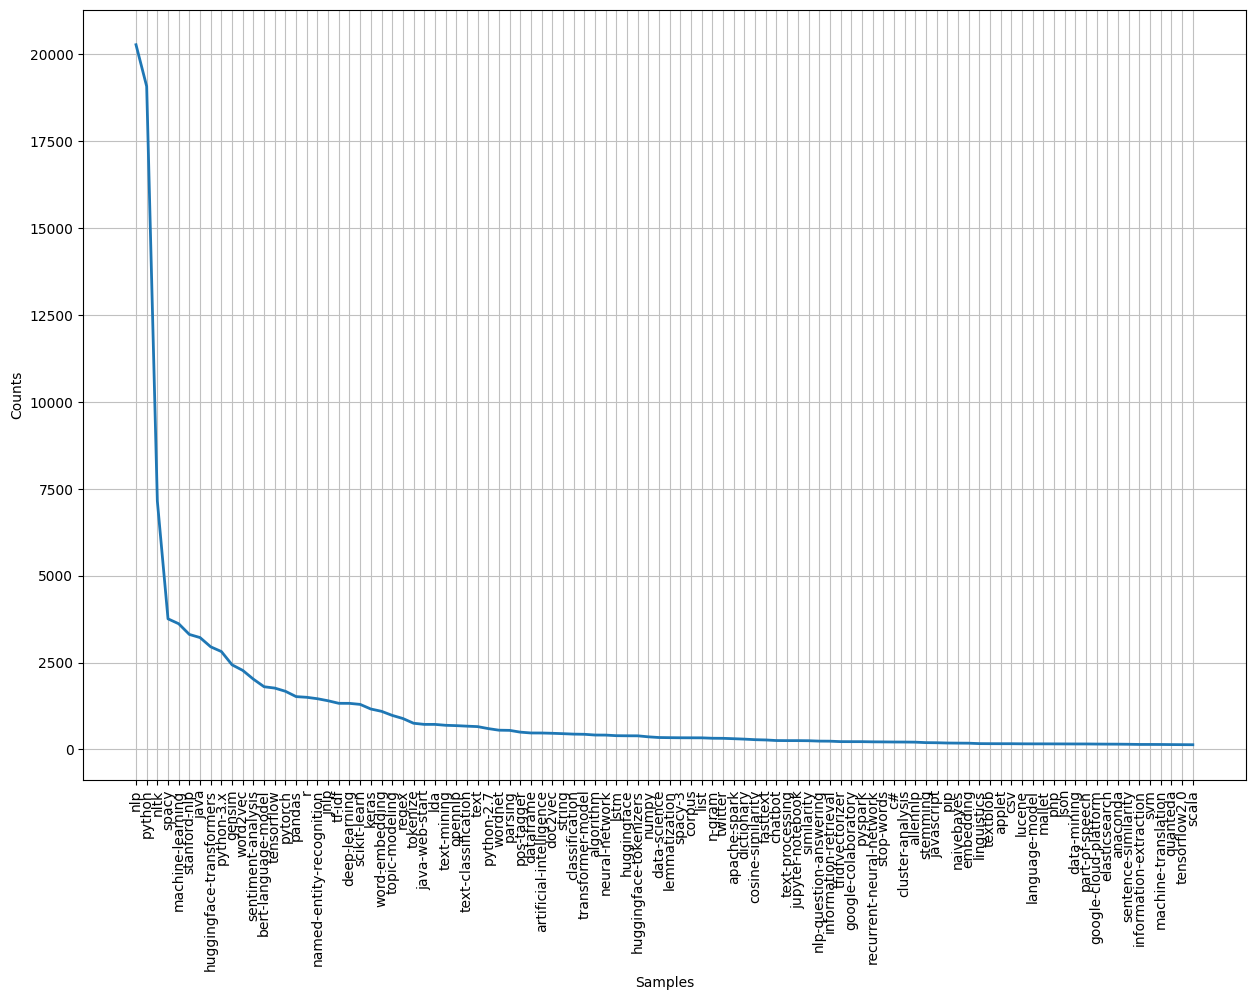

<Axes: xlabel='Samples', ylabel='Counts'>

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)

In [28]:
frequencies_words

[('nlp', 20272),
 ('python', 19075),
 ('nltk', 7144),
 ('spacy', 3757),
 ('machine-learning', 3616),
 ('stanford-nlp', 3308),
 ('java', 3218),
 ('huggingface-transformers', 2952),
 ('python-3.x', 2816),
 ('gensim', 2434),
 ('word2vec', 2274),
 ('sentiment-analysis', 2021),
 ('bert-language-model', 1804),
 ('tensorflow', 1765),
 ('pytorch', 1673),
 ('pandas', 1520),
 ('r', 1500),
 ('named-entity-recognition', 1459),
 ('jnlp', 1400),
 ('tf-idf', 1327),
 ('deep-learning', 1326),
 ('scikit-learn', 1296),
 ('keras', 1163),
 ('word-embedding', 1097),
 ('topic-modeling', 980),
 ('regex', 890),
 ('tokenize', 754),
 ('java-web-start', 721),
 ('lda', 721),
 ('text-mining', 695),
 ('opennlp', 685),
 ('text-classification', 670),
 ('text', 657),
 ('python-2.7', 600),
 ('wordnet', 554),
 ('parsing', 549),
 ('pos-tagger', 498),
 ('dataframe', 474),
 ('artificial-intelligence', 473),
 ('doc2vec', 465),
 ('string', 454),
 ('classification', 441),
 ('transformer-model', 436),
 ('algorithm', 415),
 ('ne

In [29]:
df_freq_words = pd.DataFrame(frequencies_words, columns =['Tag', 'Frequency'])
df_freq_words.to_csv("../data/cleaned/freq_words.csv")